In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn import metrics

In [300]:
 #Import the os module
import os


os.chdir('C:/Users/payal/Downloads/520')

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))



Current working directory: C:\Users\payal\Downloads\520


In [301]:
#Loading the data in python
data = pd.read_csv('Churn_Modelling.csv')

In [302]:
# snapshot of data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [303]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [280]:
#Dropping insignificant columns like Row number, customerid and Surname
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Text(0.5, 1.0, 'Proportion of customer churned vs retained')

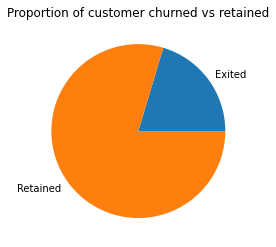

In [281]:
#Visualising proportion of customers retained vs exited.
labels = "Exited","Retained"
sizes = [data.Exited[data["Exited"]==1].count(), data.Exited[data["Exited"]==0].count()]
fig, ax1 = plt.subplots()

ax1.pie(sizes, labels= labels)
plt.title("Proportion of customer churned vs retained")

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

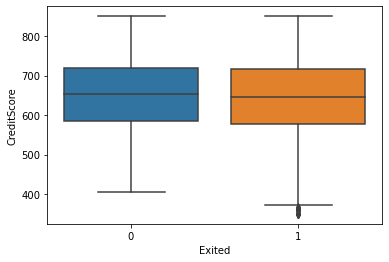

In [282]:
# Visualizing relationship between other variables and customer retention
sn.boxplot(y='CreditScore', x= 'Exited', data = data)


<AxesSubplot:xlabel='Exited', ylabel='Age'>

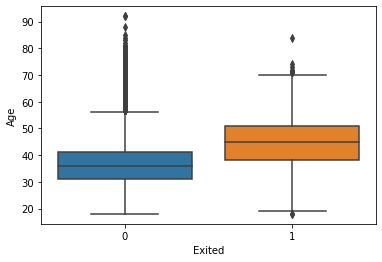

In [283]:
sn.boxplot(y='Age', x= 'Exited', data = data)

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

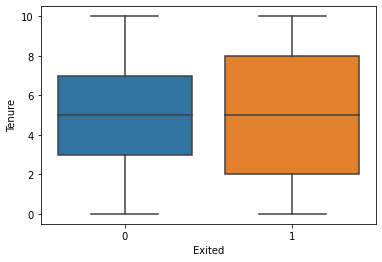

In [284]:
sn.boxplot(y='Tenure', x= 'Exited', data = data)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

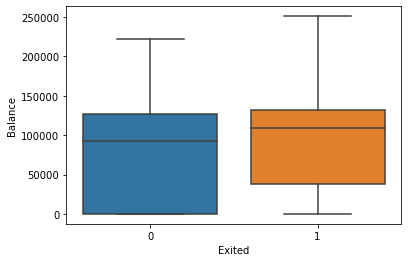

In [285]:
sn.boxplot(y='Balance', x= 'Exited', data = data)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

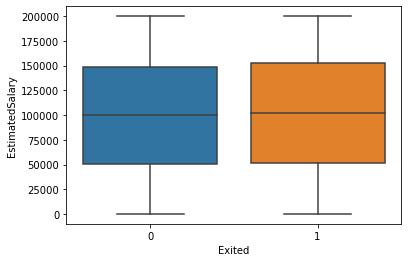

In [286]:
sn.boxplot(y='EstimatedSalary', x= 'Exited', data = data)

<AxesSubplot:xlabel='Geography', ylabel='count'>

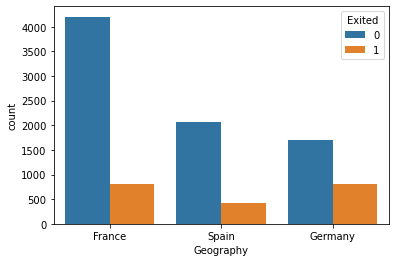

In [287]:
sn.countplot(x="Geography", hue="Exited", data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

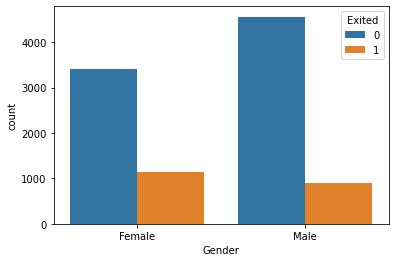

In [288]:
sn.countplot(x="Gender", hue="Exited", data=data)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

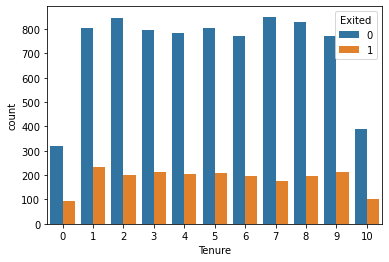

In [289]:
sn.countplot(x="Tenure", hue="Exited", data=data)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

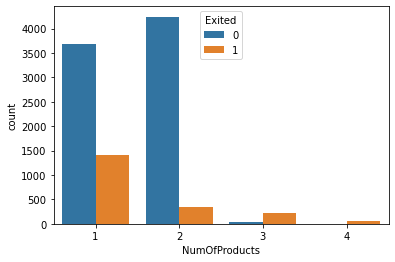

In [290]:
sn.countplot(x="NumOfProducts", hue="Exited", data=data)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

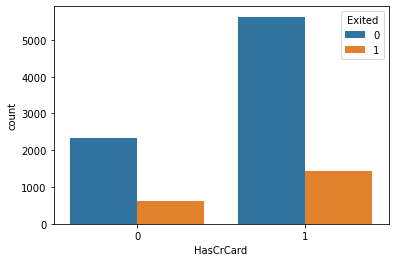

In [291]:
sn.countplot(x="HasCrCard", hue="Exited", data=data)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

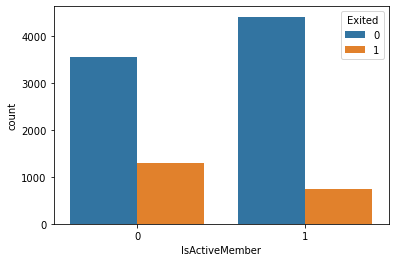

In [292]:
sn.countplot(x="IsActiveMember", hue="Exited", data=data)

In [293]:
#Spliting data into Test and Train set
training_data = data.sample(frac=0.75, random_state=25)
testing_data = data.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")
training_data.columns





No. of training examples: 7500
No. of testing examples: 2500


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [294]:
training_data['Gender'] = LabelEncoder().fit_transform(training_data['Gender'])

training_data['Geography'] = training_data['Geography'].map({
    'Germany': 1,
    'Spain': 0,
    'France': 0
})

testing_data['Gender'] = LabelEncoder().fit_transform(testing_data['Gender'])

testing_data['Geography'] = testing_data['Geography'].map({
    'Germany': 1,
    'Spain': 0,
    'France': 0
})


In [295]:
x_train = training_data.drop(['Exited'], axis=1)
x_test = testing_data.drop(['Exited'], axis=1)

y_train = training_data['Exited']
y_test = testing_data['Exited']

In [296]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [297]:
pred = model.predict(x_test)

In [298]:
metrics.mean_squared_error(y_true=y_test, y_pred = pred)

0.2272